In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from scipy import interpolate

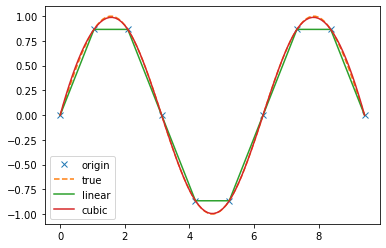

In [3]:
x = np.linspace(0, 3 * np.pi, 10)
y = np.sin(x)
x_ = np.linspace(0, 3 * np.pi, 100)
y_ = np.sin(x_)

plt.plot(x, y, 'x', label='origin')
plt.plot(x_, y_, '--', label='true')

linear_spline = interpolate.interp1d(x, y, kind='linear')
plt.plot(x_, linear_spline(x_), '-', label='linear')

cubic_spline = interpolate.interp1d(x, y, kind=3)
plt.plot(x_, cubic_spline(x_), '-', label='cubic')

plt.legend()

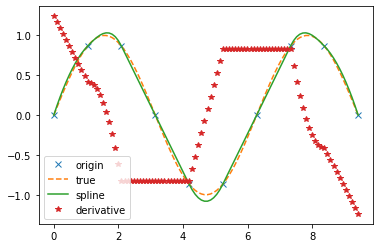

In [4]:
x = np.linspace(0, 3 * np.pi, 10)
y = np.sin(x)
x_ = np.linspace(0, 3 * np.pi, 100)
y_ = np.sin(x_)

plt.plot(x, y, 'x', label='origin')
plt.plot(x_, y_, '--', label='true')

# spline = interpolate.CubicSpline(x, y)
spline = interpolate.Akima1DInterpolator(x, y)
plt.plot(x_, spline(x_), label='spline')
d_spline = spline.derivative(1)
plt.plot(x_, d_spline(x_), '*', label='derivative')

plt.legend()

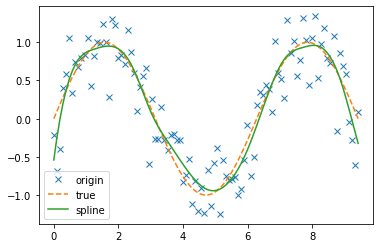

In [5]:
x = np.linspace(0, 3 * np.pi, 100)
noise = np.full_like(x, 0.3)
y = np.sin(x) + noise * np.random.normal(size=x.size)
x_ = np.linspace(0, 3 * np.pi, 100)
y_ = np.sin(x_)

plt.plot(x, y, 'x', label='origin')
plt.plot(x_, y_, '--', label='true')

spline = interpolate.UnivariateSpline(x, y, w=1 / noise, k=3)
plt.plot(x_, spline(x_), label='spline')
# d_spline = spline.derivative(1)
# plt.plot(x_, d_spline(x_), '*', label='derivative')

plt.legend()

In [6]:
from scipy import integrate

In [7]:
integrate.quad(lambda x: np.exp(-x**2), 0.0, 1.0)

(0.7468241328124271, 8.291413475940725e-15)

In [8]:
result, _ = integrate.quad(lambda x: np.exp(-x**2), 0.0, 1.0)

In [10]:
result = integrate.quad(lambda x: np.exp(-x**2), 0.0, np.inf)[0]
result - np.sqrt(np.pi) / 2

0.0

In [14]:
x = np.r_[0:np.pi:100j]
y = np.sin(x)
integrate.trapz(x=x, y=y)

1.9998321638939927

In [15]:
integrate.cumtrapz(x=x, y=y)

array([5.03415368e-04, 2.01315457e-03, 4.52769744e-03, 8.04451203e-03,
       1.25600572e-02, 1.80697862e-02, 2.45681512e-02, 3.20486089e-02,
       4.05036271e-02, 4.99246923e-02, 6.03023183e-02, 7.16260558e-02,
       8.38845026e-02, 9.70653155e-02, 1.11155223e-01, 1.26140037e-01,
       1.42004669e-01, 1.58733145e-01, 1.76308622e-01, 1.94713401e-01,
       2.13928951e-01, 2.33935924e-01, 2.54714173e-01, 2.76242778e-01,
       2.98500061e-01, 3.21463610e-01, 3.45110303e-01, 3.69416330e-01,
       3.94357216e-01, 4.19907850e-01, 4.46042502e-01, 4.72734858e-01,
       4.99958041e-01, 5.27684639e-01, 5.55886735e-01, 5.84535930e-01,
       6.13603378e-01, 6.43059810e-01, 6.72875566e-01, 7.03020624e-01,
       7.33464630e-01, 7.64176931e-01, 7.95126601e-01, 8.26282476e-01,
       8.57613186e-01, 8.89087183e-01, 9.20672776e-01, 9.52338159e-01,
       9.84051450e-01, 1.01578071e+00, 1.04749400e+00, 1.07915939e+00,
       1.11074498e+00, 1.14221898e+00, 1.17354969e+00, 1.20470556e+00,
      

In [16]:
integrate.simps(x=x, y=y)

1.9999999690165366

In [25]:
x, dx = np.linspace(0, np.pi, 129, retstep=True)
y = np.sin(x)
integrate.romb(y, dx=dx)

2.0

In [27]:
import math

In [28]:
%timeit integrate.romb(np.sin(x), dx)
%timeit integrate.quad(math.sin, 0, np.pi)

153 µs ± 2.52 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
6.88 µs ± 55.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [31]:
integrate.odeint
integrate.OdeSolver

In [33]:
from functools import partial

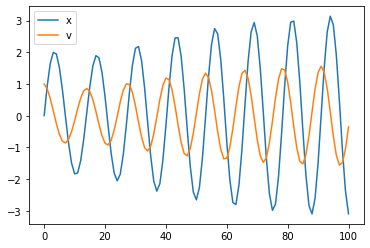

In [45]:
def dydt(t, y, omega, delta, omega0, f):
    """
    t : coordinate
    y : [x, v]
    """
    x, v = y
    dxdt = v
    dvdt = f * np.sin(omega0 * t) - 2 * delta * v - omega0**2 * x
    return [dxdt, dvdt]
    

t = np.r_[0:100:101j]
x0 = 0.0
v0 = 1.0
result = integrate.solve_ivp(
    partial(dydt, omega=1.0, omega0=0.5, delta=0.03, f=0.1),
    [t[0], t[-1]],
    y0=[x0, v0],
    t_eval=t,
    vectorized=True,
)
assert result.success
plt.plot(t, result.y[0], label='x')
plt.plot(t, result.y[1], label='v')
plt.legend()

In [46]:
from scipy import spatial

In [47]:
spatial.cKDTree
# O(k log N)

scipy.spatial.ckdtree.cKDTree